In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
import copy

In [2]:
df=pd.read_csv("AdmissionDataset/data.csv")
X = df.drop(['Chance of Admit ','Serial No.'],axis=1)
Y = df['Chance of Admit ']
X = (X - X.mean())/X.std()
# X = StandardScaler().fit_transform(X)
# X = preprocessing.normalize(X)

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
# features=['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']

In [4]:
# X_test = (X_test - X_test.mean())/X_test.std()
# X_train = (X_train - X_train.mean())/X_train.std()

In [5]:
def mse(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.power((y_true - y_pred),2))

In [6]:
lamda = 1000
Y_test=np.array(Y_test)
errorlist=[]
# lamdalist=[.00001,.0001,.001,.01,0.1,1,5,10,15,20,25,50,100,200,500]
lamdalist=[]
ans=lamda
prev=100000000000
i1=0
while lamda>0.0000001:
#     print(l)
    lassoreg = Lasso(alpha=lamda,max_iter=10000)
    lassoreg.fit(X_train,Y_train)
    y_pred = lassoreg.predict(X_test)
    error=1-r2_score(Y_test,y_pred)
    
    if error < prev:
        ans=lamda
        prev=error
    
#     prev=error
    print(error)
    i1=i1+1
    errorlist.append(error)
    lamdalist.append(lamda)
    lamda=lamda/10

1.010462130439861
1.010462130439861
1.010462130439861
1.010462130439861
0.7544160824323698
0.2745927695089103
0.2652499867176732
0.26494230632209925
0.26491733669307727
0.264914499405147
0.26491385731068895


In [7]:
print(ans)

1.0000000000000002e-07


Text(0.5, 1.0, 'Lamda vs Error')

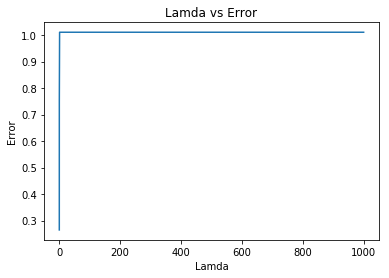

In [8]:
fig, ax = plt.subplots()
# print(lamdalist)
# print(errorlist)
ax.plot(lamdalist,errorlist)
ax.set_xlabel("Lamda", fontsize=10)
ax.set_ylabel("Error", fontsize=10)
ax.set_title('Lamda vs Error')

In [9]:
X_train_c = X_train
ones = np.ones([X_train_c.shape[0],1])

In [10]:
X_train_c = np.concatenate((ones,X_train_c),axis=1)

In [11]:
Y_train_c = pd.DataFrame(Y_train)
Y_train_c = Y_train_c.values

In [12]:
theta = np.zeros([1,8])

In [13]:
alpha = 0.01
iters = 10000

In [14]:
def gradientDescent(X,y,theta,iters,alpha,lamda):
    for i in range(iters):
        theta1=copy.deepcopy(theta)
        theta1[0][0]=0
        theta = theta - (alpha/len(X)) * (np.sum(X * (X @ theta.T - y), axis=0)+(lamda/2)*np.sign(theta1))
    
    return theta

In [15]:
lamda = 1000
errorlist=[]
# lamdalist=[0.00001,0.0001,0.001,0.01,0.1,1,5,10,15,20,25,50,100,200,500]
lamdalist=[]
ans=lamda
i1=0
prev=10000000000
while lamda>0.0000001:
    theta = np.zeros([1,8])
    g = gradientDescent(X_train_c,Y_train_c,theta,iters,alpha,lamda)
    theta=g[0]
    y_pred=[]
    for index,row in X_test.iterrows():
        row=list(row)
        y1=0
        for i in range(0,7):
            y1 = y1 + theta[i+1]*row[i]
        y1=y1+theta[0]
        y_pred.append(y1)
        
    error=1-r2_score(Y_test,y_pred)
    
    if error < prev:
        ans=lamda
        prev=error
    
    i1=i1+1
#     prev=error
    print(error)
    errorlist.append(error)
    lamdalist.append(lamda)
    lamda=lamda/10

1.0737167040267999
0.9813847654978062
0.2822040265218866
0.2654198953472706
0.26495204419095875
0.2649172929680039
0.26491393818463504
0.26491360390968743
0.2649135704942265
0.2649135671528009
0.2649135668186593


In [16]:
print(ans)

1.0000000000000002e-07


Text(0.5, 1.0, 'Lamda vs Error')

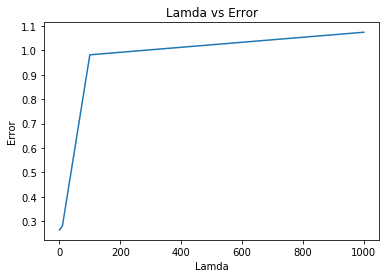

In [17]:
fig, ax = plt.subplots()
# print(lamdalist)
# print(errorlist)
ax.plot(lamdalist,errorlist)
ax.set_xlabel("Lamda", fontsize=10)
ax.set_ylabel("Error", fontsize=10)
ax.set_title('Lamda vs Error')